$$
Discente:Gabriel\,Souza\,Almeida.\,\,
Matricula:2022010788
$$


Questão 1 -  Considere um sistema de tempo LTI de tempo continuo e causal com a seguinte função de transferencia:


$$H(s) = \frac{2s + 3}{s^2 + 2s + 5}$$



a) Utilizando cálculo númerico, simule esse sistema de tempo contínuo quando a entrada é o degrau
unitário.

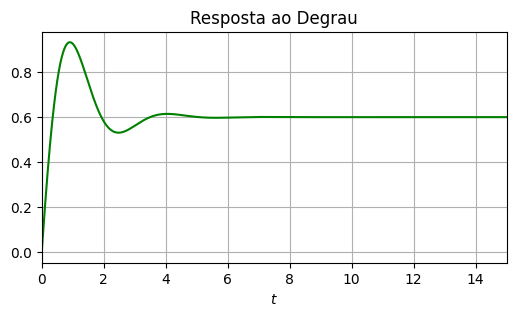

In [92]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

numerador = np.array([2, 3])
denominador = np.array([1 , 2, 5])
funcao = control.tf(numerador , denominador)
funcao

t_final = 15

t_inicial = 0

dt = 1e-4

Numeropontos = int((t_final - t_inicial)/dt)

t = np.linspace(t_inicial,t_final,Numeropontos)

_, sr = control.step_response(funcao, t)

plt.figure(figsize=(6,3))
plt.title("Resposta ao Degrau")
plt.xlabel("$t$")
plt.plot(t, sr, 'g')
plt.grid()
plt.xlim(t_inicial,t_final)
plt.show()

b) Utilizando algum algoritmo de computador, apresente o diagrama de polos e zeros para esse sistema e a partir desse, discuta a estabilidade do sistema.

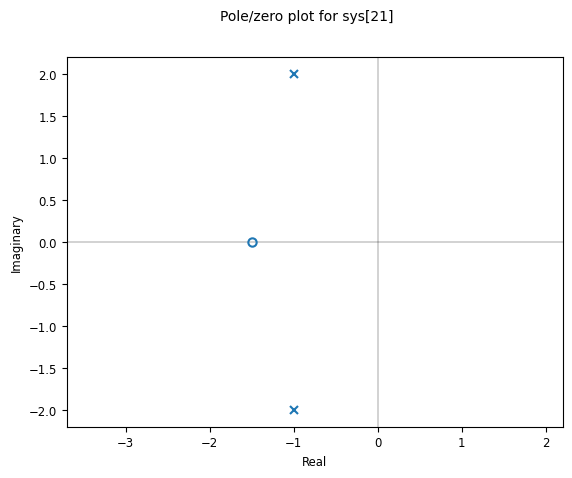

In [18]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

denominador = np.array([1 , 2, 5])
numerador = np.array([2, 3])
funcao = control.tf(numerador , denominador)
funcao

control.pzmap(funcao)

Questão 2 (não irei colocar aqui por conta que é muito grande)

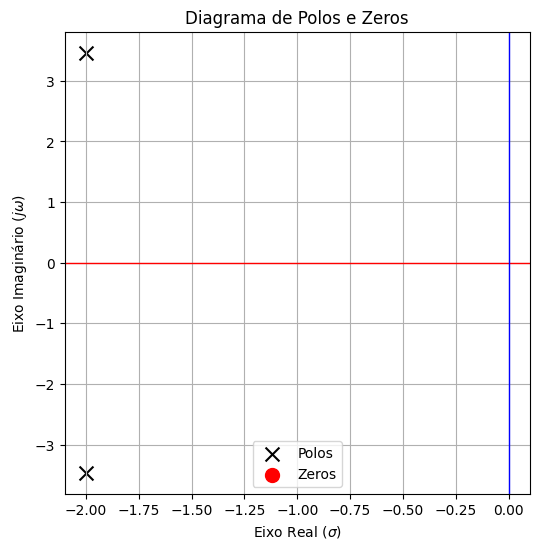

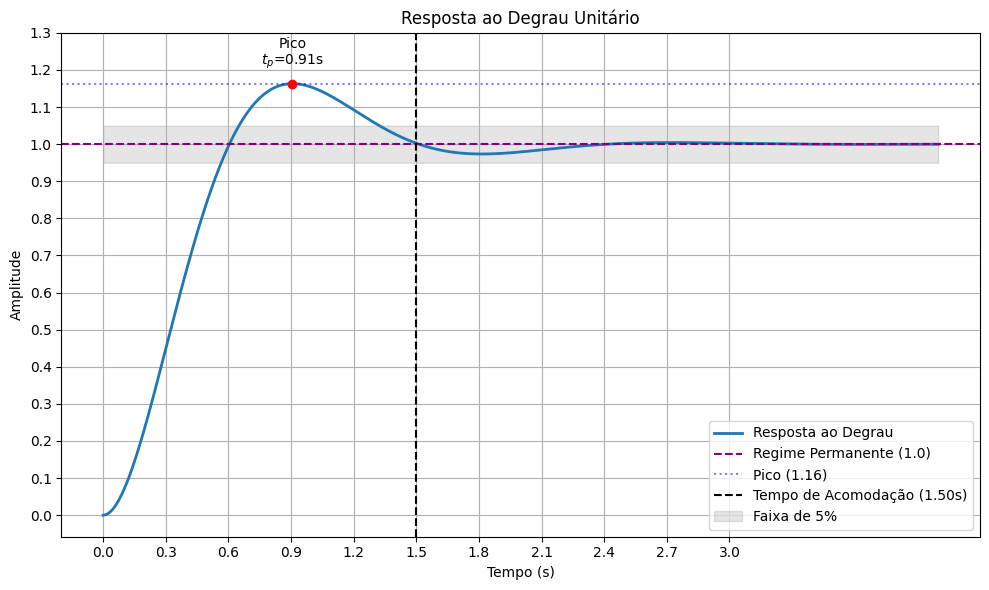

Alternativa A
Fator de amortecimento (zeta): 0.5
Frequência natural (wn): 4.0 rad/s
Classificação: Sistema Subamortecido (0 < zeta < 1)

Alternativa B
Polos: [-2.+3.46410162j -2.-3.46410162j]
Estabilidade: O sistema é Estável (todos os polos têm parte real negativa).

Alternativa C
Tempo de subida : 0.6046 s
Tempo de pico : 0.9069 s
Sobressinal: 16.30%
Tempo de acomodação : 1.5000 s


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

denominador = [1, 4, 16]
numerador = [16]

sistema = signal.TransferFunction(numerador, denominador)

WN = np.sqrt(denominador[2])
zeta = denominador[1] / (2 * WN)

zeros = sistema.zeros
polos = sistema.poles

plt.figure(figsize=(6, 6))
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='black', s=100, label='Polos')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='red', s=100, label='Zeros')
plt.axhline(0, color='red', lw=1)
plt.axvline(0, color='blue', lw=1)
plt.title('Diagrama de Polos e Zeros')
plt.xlabel(r'Eixo Real ($\sigma$)')
plt.ylabel(r'Eixo Imaginário ($j\omega$)')
plt.grid(True, which='both')
plt.legend()


wd = WN * np.sqrt(1 - zeta**2)

temposubida = (np.pi - np.arccos(zeta)) / wd
tempopico = np.pi / wd
sobressinal = 100 * np.exp((-zeta * np.pi) / np.sqrt(1 - zeta**2))
tempoacomodar = 3 / (zeta * WN) 


t_sim = np.linspace(0, 4, 1000)
t, y = signal.step(sistema, T=t_sim)

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Resposta ao Degrau', linewidth=2)


plt.axhline(1, color='purple', linestyle='--', label='Regime Permanente (1.0)')
plt.axhline(1 * (1 + sobressinal/100), color='blue', linestyle=':', alpha=0.5, label=f'Pico ({1 + sobressinal/100:.2f})')

plt.plot(tempopico, 1 * (1 + sobressinal/100), 'ro')
plt.text(tempopico, 1 * (1 + sobressinal/100) + 0.05, f'Pico\n$t_p$={tempopico:.2f}s', ha='center')

plt.axvline(tempoacomodar, color='black', linestyle='--', label=f'Tempo de Acomodação ({tempoacomodar:.2f}s)')

plt.fill_between(t, 0.95, 1.05, color='black', alpha=0.1, label='Faixa de 5%')

plt.title('Resposta ao Degrau Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True); plt.xticks(np.arange(0,3.1,0.3)); plt.yticks(np.arange(0, 1.4, 0.1))
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print(f"Alternativa A")
print(f"Fator de amortecimento (zeta): {zeta}")
print(f"Frequência natural (wn): {WN} rad/s") 

if 0 < zeta < 1:
    print(f"Classificação: Sistema Subamortecido (0 < zeta < 1)")
else:
    print(f"Classificação: Não é subamortecido")

print()
print(f"Alternativa B")
print(f"Polos: {polos}")
estabilidade = "Estável" if np.all(np.real(polos) < 0) else "Instável"
print(f"Estabilidade: O sistema é {estabilidade} (todos os polos têm parte real negativa).")
print()


print(f"Alternativa C")
print(f"Tempo de subida : {temposubida:.4f} s")
print(f"Tempo de pico : {tempopico:.4f} s")
print(f"Sobressinal: {sobressinal:.2f}%")
print(f"Tempo de acomodação : {tempoacomodar:.4f} s")


QUESTÃO 3 - Considere o sistema de controle apresentado na Figura 2. Supondo que deseja-se que o sistema em malha
fechada possua um sobressinal máximo de 20% e um tempo de subida de 0,3s.

a) Determine os valores de 𝐾𝑝 e 𝐾𝑑 que atendem essas condições.
B) Considerando os valores de 𝐾𝑝 e 𝐾𝑑 calculados no item anterior, determine os valores do tempo de
subida e o tempo de acomodação do sistema em malha fechada.

C) Simule o sistema de controle em malha fechada considerando que a referência é o degrau unitário.
Verifique graficamente os valores de tempo de subida, tempo de pico, sobressinal e o tempo de
acomodação.

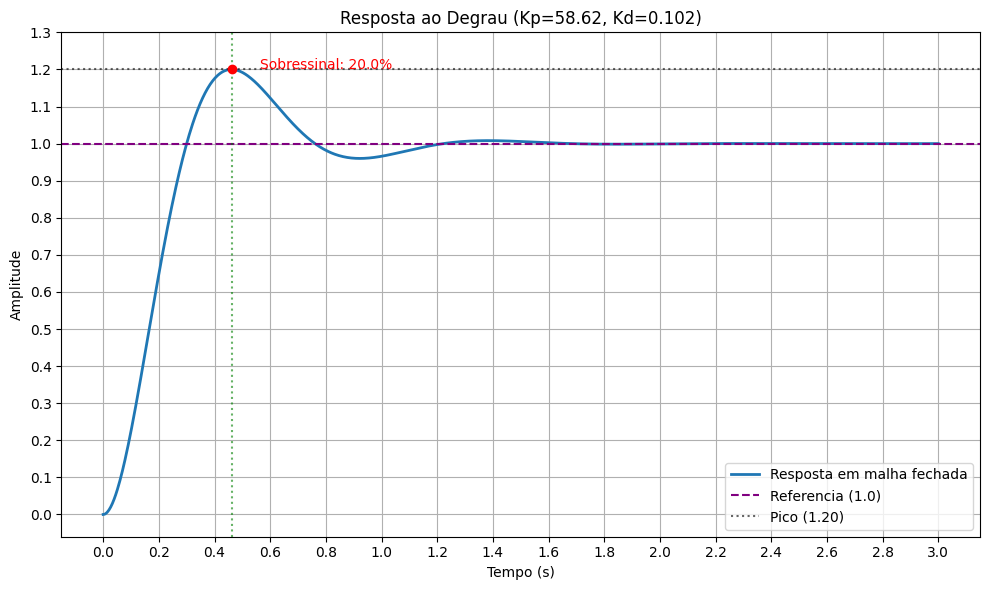

alternativa a
Zeta necessario: 0.4559
Frequencia natural: 7.6563
Proporcional: 58.6184
Derivativo: 0.1020

alternativa b
Tempo de subida : 0.3000 s
Tempo de acomodação: 0.8594 s (critério 5%)


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

mp = 0.2
temposubida = 0.3


Kp = WN**2
Kd = (2*zeta*WN - 1) / Kp

zeta = -np.log(mp) / np.sqrt(np.pi**2 + (np.log(mp)**2))
WN = (np.pi - np.arccos(zeta)) / (temposubida * np.sqrt(1 - zeta**2))

wd = WN * np.sqrt(1 - zeta**2)
temposubida_c = (np.pi - np.arccos(zeta)) /wd
tempoacomodacao = 3 / (zeta * WN)


numerador = [Kp]
denominador = [1, (1 + Kp *Kd), Kp]
sistema = signal.TransferFunction(numerador, denominador)

t_sim = np.linspace(0, 3, 1000)
t, y = signal.step(sistema, T=t_sim)

pico_max = np.max(y)
tempo_pico = t[np.argmax(y)]
sobressinal_porcent = (pico_max -1) * 100

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Resposta em malha fechada', linewidth=2)

plt.axhline(1, color='purple', linestyle='--', label='Referencia (1.0)')
plt.axhline(pico_max, color='black', linestyle=':', alpha=0.6, label=f'Pico ({pico_max:.2f})')
plt.axvline(tempo_pico, color='green', linestyle=':', alpha=0.6)

plt.plot(tempo_pico, pico_max, 'ro')
plt.text(tempo_pico + 0.1, pico_max, f'Sobressinal: {sobressinal_porcent:.1f}%', color='red')

plt.title(f'Resposta ao Degrau (Kp={Kp:.2f}, Kd={Kd:.3f})')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True); plt.xticks(np.arange(0,3.1,0.2)); plt.yticks(np.arange(0, 1.4, 0.1))
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



print(f"alternativa a")
print(f"Zeta necessario: {zeta:.4f}")
print(f"Frequencia natural: {WN:.4f}")
print(f"Proporcional: {Kp:.4f}")
print(f"Derivativo: {Kd:.4f}")

print()
print(f"alternativa b")
print(f"Tempo de subida : {temposubida_c:.4f} s")
print(f"Tempo de acomodação: {tempoacomodacao:.4f} s (critério 5%)")




* Questão 4-  Considere um sistema linear e invariante no tempo estável descrito pela seguinte equaçãao diferencial:

$$\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) = -\frac{dx(t)}{dt}$$

$$Y(s)(s^2 + 5s + 6) = -sX(s)$$

$$H(s) = \frac{-s}{s^2 + 5s + 6}$$

a) Utilizando alguma linguagem de programação, plote o gráfico da resposta em magnitude e resposta em fase para esse sistema.
b) Analisando o resultado obtido no item (b), classifique o sistema em (i) passa-baixas, (ii) passa-altas,
(iii) rejeita-faixas ou (iv) passa-faixas

C:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


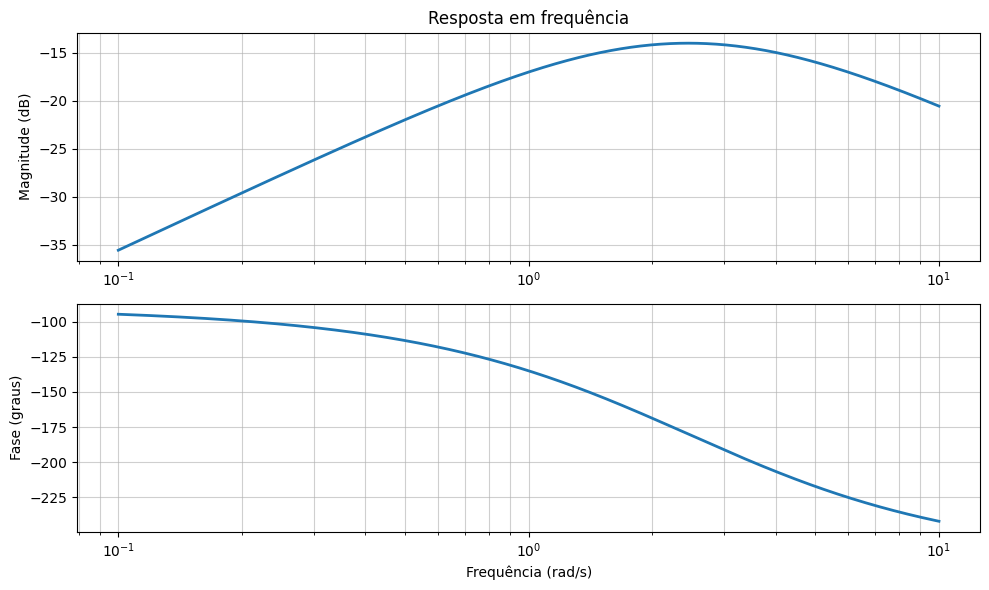

In [5]:
import control as control
import matplotlib.pyplot as plt
import numpy as np

numerador = np.array([-1, 0])
denominador = np.array([1, 5, 6])
funcao = control.tf(numerador, denominador)
magnitude, fase, w = control.bode(funcao, plot=False)

fase_g = np.degrees(fase)
mag_db = 20 * np.log10(magnitude)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title('Resposta em frequência')
plt.semilogx(w, mag_db, linewidth=2)
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', ls='-', alpha=0.6)

plt.subplot(2, 1, 2)
plt.semilogx(w, fase_g, linewidth=2)
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True, which='both', ls='-', alpha=0.6)

plt.tight_layout()
plt.show()

 questão 5- A modulação em amplitude convencional consiste em gerar um sinal modulado 𝜑𝐴𝑀(𝑡) tal que:

$$
\varphi_{AM}(t) = [K + m(t)] \cos(2\pi f_c t + \phi)
$$

Determine a expressão que relaciona o espectro de 𝑦(𝑡) com o espectro de 𝑚(𝑡)

b) Demonstre que um sinal AM pode ser gerado filtrando-se o sinal 𝑦(𝑡) em um filtro passa-faixas.
Determine a frequência central desse filtro, bem como sua largura de banda.

c) Utilizando alguma linguagem de programação, implemente o modulador AM proposto. Apresente
os seguintes gráficos:

i. Sinal de mensagem e sinal de portadora;

ii.Espectro do sinal de mensagem e do sinal de portadora;

iii.Sinal de saída do elemento não-linear;

iv.Espectro de saída do sinal de saída do elemento não-linear;

v. Sinal de saída do filtro passa-faixas;

vi. Espectro de saída do sinal de saída do filtro passa-faixas.
Utilize como sinal modulante

$$
m(t) = \cos(2\pi f_m t)
$$

com 𝑓𝑚 = 1kHz, e como frequência de portadora 𝑓𝑐 = 10 kHz

Resposta letra A
$$y(t) = [m(t) + \cos(2\pi f_c t)] + \frac{1}{2}[m(t) + \cos(2\pi f_c t)]^2$$
$$[m(t) + \cos(2\pi f_c t)]^2 = m^2(t) + 2m(t)\cos(2\pi f_c t) + \cos^2(2\pi f_c t)$$
$$y(t) = {m(t) + \frac{1}{2}m^2(t) + \frac{1}{4}}{} + {[1 + m(t)]\cos(2\pi f_c t)} + {\frac{1}{4}\cos(4\pi f_c t)}$$

Resposta letra B

$$s_{AM}(t) = [1 + m(t)]\cos(2\pi f_c t)$$
                                                       Com Frequência central de 10KHz Largura de Banda: 2B = 2KHz

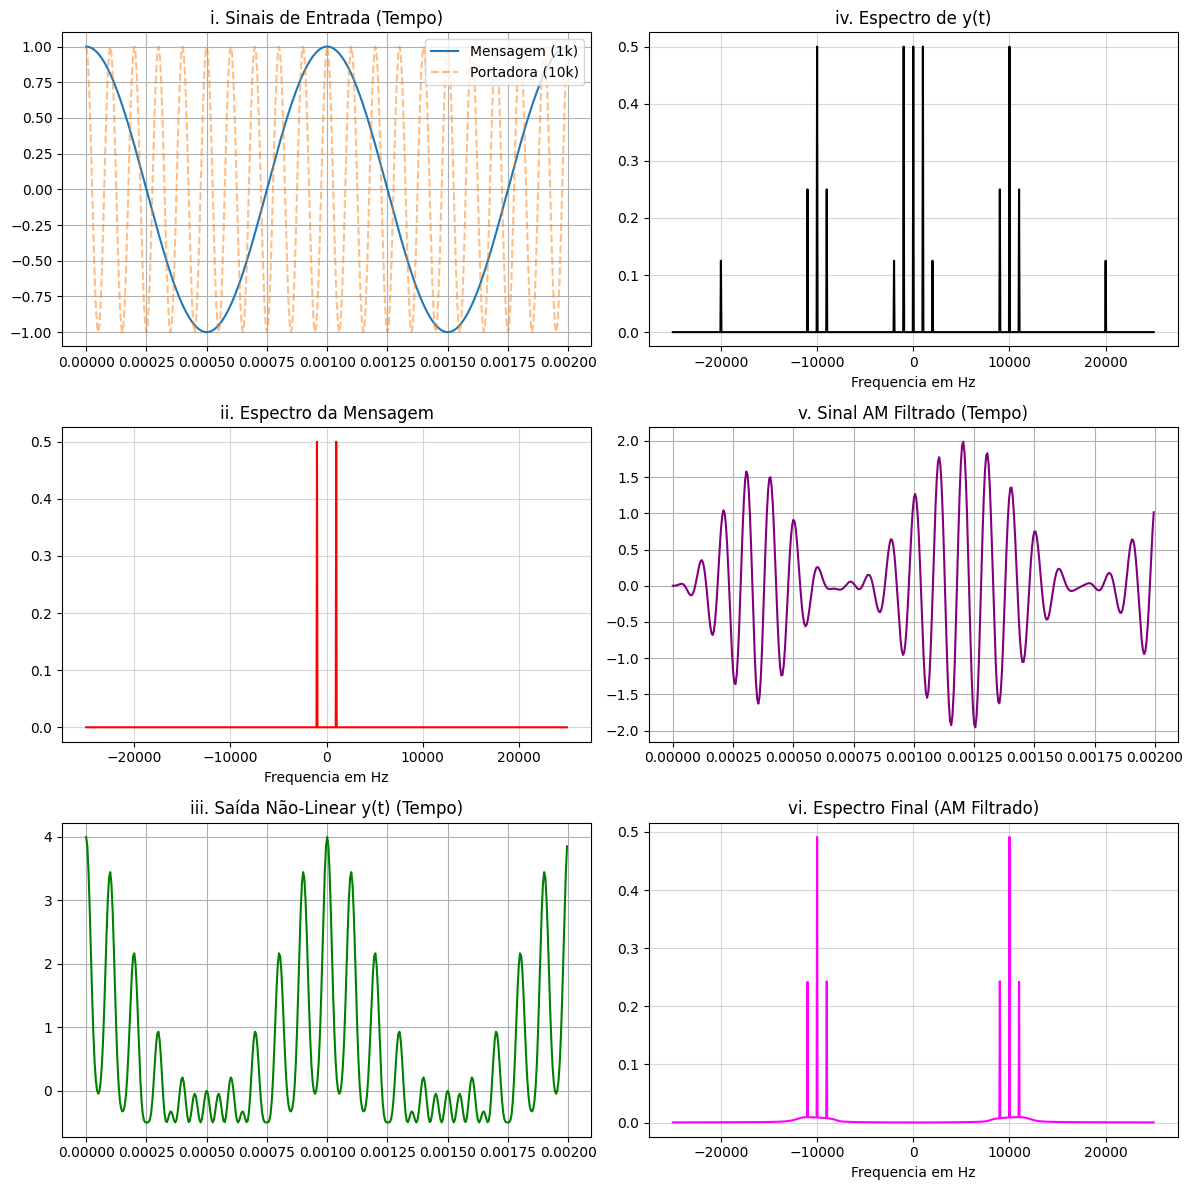

In [8]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy.fft as fft
import numpy as np


fm = 1000
fc = 10000
duracao = 0.02
fs = 200000

tempo = np.arange(0, duracao, 1/fs)

ct = np.cos(2 * np.pi * fc * tempo)
mt = np.cos(2 * np.pi * fm * tempo)

xt = mt + ct
yt = xt + 0.5 * (xt**2)

nyquist = 0.5 * fs
baixa = 8000 / nyquist
alta = 12000 / nyquist
b, a = signal.butter(4, [baixa, alta], btype='bandpass')

y_am_filtrado = signal.lfilter(b, a, yt)

def plot_spec(sig, fs, ax, title, color='red'):
    Y = fft.fft(sig)
    N = len(sig)
    freqs = fft.fftfreq(N, 1/fs)

    Y_shift = fft.fftshift(Y)
    freqs_shift = fft.fftshift(freqs)

    mag = np.abs(Y_shift) / N

    mask = (freqs_shift >= -25000) & (freqs_shift <= 25000)

    
    ax.plot(freqs_shift[mask], mag[mask], color=color) 
    ax.set_title(title)
    ax.set_xlabel("Frequencia em Hz")
    ax.grid(True, alpha=0.5)


fig, axs = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

limit = int(0.002 * fs)


axs[0, 0].plot(tempo[:limit], mt[:limit], label='Mensagem (1k)', color='tab:blue') 
axs[0, 0].plot(tempo[:limit], ct[:limit], label='Portadora (10k)', alpha=0.5, linestyle='--', color='tab:orange') 
axs[0, 0].set_title('i. Sinais de Entrada (Tempo)')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True)

plot_spec(yt, fs, axs[0, 1], 'iv. Espectro de y(t)', color='black') 

plot_spec(mt, fs, axs[1, 0], 'ii. Espectro da Mensagem', color='red') 

axs[1, 1].plot(tempo[:limit], y_am_filtrado[:limit], color='purple')
axs[1, 1].set_title('v. Sinal AM Filtrado (Tempo)')
axs[1, 1].grid(True)

axs[2, 0].plot(tempo[:limit], yt[:limit], color='green') 
axs[2, 0].set_title('iii. Saída Não-Linear y(t) (Tempo)')
axs[2, 0].grid(True)


plot_spec(y_am_filtrado, fs, axs[2, 1], 'vi. Espectro Final (AM Filtrado)', color='magenta') 

plt.tight_layout()
plt.show()

6) Considere que deseja-se multiplexar em frequencia três sinais 𝑥1(𝑡), 𝑥2(𝑡) e 𝑥3(𝑡), definidos como:


Considere os seguintes sinais descritos no domínio do tempo:

\begin{align*}
    x_1(t) &= \cos(20\pi t) \\
    x_2(t) &= \cos(50\pi t) \\
    x_3(t) &= \cos(80\pi t)
\end{align*}

Para isso, cada sinal e modulado AM-DSB-SC com frequências de sub-portadoras de 𝑓𝑐1 = 1100 Hz,
𝑓𝑐2 = 2200 Hz e 𝑓𝑐3 = 3300 Hz, respectivamente. O sinal multiplexado então e transmitido em um
esquema AM-DSB-SC utilizando uma frequencia de portadora de 𝑓𝑐 = 25kHz.

a) Proponha um esquema para o transmissor e o receptor para essa multiplexação por divisão em 
frequência. Deve ser possível transmitir todos os sinais em um mesmo canal de comunicações e no
receptor, deve-se ser capaz de recuperar cada sinal individualmente.

b) Utilizando um algoritmo de computador, simule o sistema proposto. Apresente como resultados:

i. Forma de onda e espectro para os sinais 𝑥1(𝑡), 𝑥2(𝑡) e 𝑥3(𝑡).

ii. Espectro dos sinais 𝑥1 (𝑡), 𝑥2 (𝑡) e 𝑥3 (𝑡) apos a modulação com as sub-portadoras;

iii. Espectro do sinal multiplexado em frequencia;

iv. Forma de onda e espectro dos sinais apos a recepção


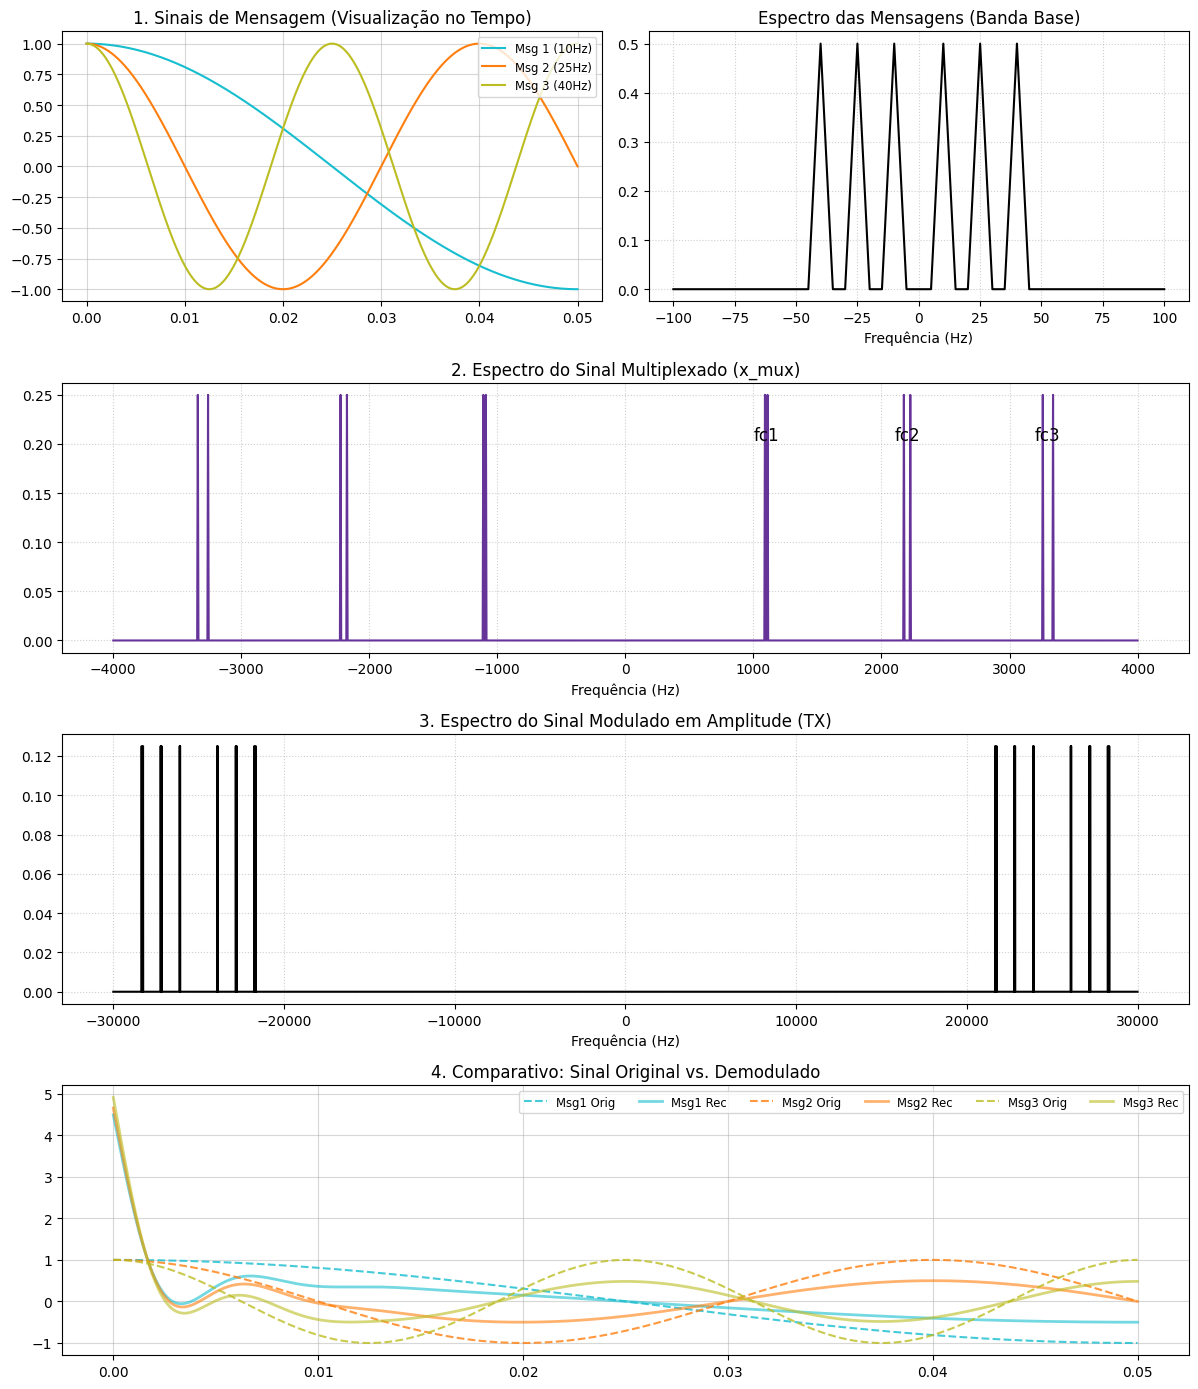

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as fft

fs = 400000 
duracao = 0.2
vetor_tempo = np.arange(0, duracao, 1/fs)

fc1 = 10
fc2 = 25
fc3 = 40

f_sub1 = 1100
f_sub2 = 2200
f_sub3 = 3300

f_portadora = 25000


def gerar_cos(freq, t):
    return np.cos(2 * np.pi * freq * t)

def filtro_butter_low(sinal, cutoff, fs_rate, ordem=4):
    """Aplica filtro passa-baixas."""
    nyquist = 0.5 * fs_rate
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(ordem, normal_cutoff, btype='low')
    return signal.filtfilt(b, a, sinal)

def recuperar_sinal(sinal_mux, freq_carrier, t, fs_rate, corte):
    """Demodula e filtra um canal específico."""
    sinal_mix = sinal_mux * np.cos(2 * np.pi * freq_carrier * t)
    return 2 * filtro_butter_low(sinal_mix, corte, fs_rate)


def plot_spec(sinal, fs_rate, ax, titulo, limit_axis=None, color='blue'):
    """Plota o espectro de frequência (Nome e args iguais ao original)."""
    N = len(sinal)
    Y = fft.fft(sinal)
    Y_shifted = fft.fftshift(Y)
    freqs = fft.fftshift(fft.fftfreq(N, 1/fs_rate))
    mag = np.abs(Y_shifted) / N

    if limit_axis:
        mask = (freqs >= -limit_axis) & (freqs <= limit_axis)
        ax.plot(freqs[mask], mag[mask], color=color)
    else:
        ax.plot(freqs, mag, color=color)

    ax.set_title(titulo)
    ax.set_xlabel("Frequência (Hz)")
    ax.grid(True, alpha=0.6, linestyle=':')

msg1 = gerar_cos(fc1, vetor_tempo)
msg2 = gerar_cos(fc2, vetor_tempo)
msg3 = gerar_cos(fc3, vetor_tempo)

sinal_mux = (msg1 * gerar_cos(f_sub1, vetor_tempo) +
             msg2 * gerar_cos(f_sub2, vetor_tempo) +
             msg3 * gerar_cos(f_sub3, vetor_tempo))

sinal_tx = sinal_mux * gerar_cos(f_portadora, vetor_tempo)

rx_raw = sinal_tx * gerar_cos(f_portadora, vetor_tempo)
sinal_intermediario = filtro_butter_low(rx_raw, 5000, fs)

rec_msg1 = recuperar_sinal(sinal_intermediario, f_sub1, vetor_tempo, fs, 150)
rec_msg2 = recuperar_sinal(sinal_intermediario, f_sub2, vetor_tempo, fs, 150)
rec_msg3 = recuperar_sinal(sinal_intermediario, f_sub3, vetor_tempo, fs, 150)

fig = plt.figure(figsize=(12, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

zoom_amostras = 20000 

ax1 = plt.subplot(4, 2, 1)
ax1.plot(vetor_tempo[:zoom_amostras], msg1[:zoom_amostras], label=f'Msg 1 ({fc1}Hz)', color='tab:cyan')
ax1.plot(vetor_tempo[:zoom_amostras], msg2[:zoom_amostras], label=f'Msg 2 ({fc2}Hz)', color='tab:orange')
ax1.plot(vetor_tempo[:zoom_amostras], msg3[:zoom_amostras], label=f'Msg 3 ({fc3}Hz)', color='tab:olive')
ax1.set_title("1. Sinais de Mensagem (Visualização no Tempo)")
ax1.legend(loc='upper right', fontsize='small')
ax1.grid(True, alpha=0.5)

ax2 = plt.subplot(4, 2, 2)

plot_spec(msg1+msg2+msg3, fs, ax2, "Espectro das Mensagens (Banda Base)", limit_axis=100, color='black')

ax3 = plt.subplot(4, 1, 2)

plot_spec(sinal_mux, fs, ax3, "2. Espectro do Sinal Multiplexado (x_mux)", limit_axis=4000, color='rebeccapurple')

ax3.text(f_sub1, 0.2, 'fc1', ha='center', va='bottom', fontsize=12)
ax3.text(f_sub2, 0.2, 'fc2', ha='center', va='bottom', fontsize=12)
ax3.text(f_sub3, 0.2, 'fc3', ha='center', va='bottom', fontsize=12)

ax4 = plt.subplot(4, 1, 3)

plot_spec(sinal_tx, fs, ax4, "3. Espectro do Sinal Modulado em Amplitude (TX)", limit_axis=30000, color='black')

ax5 = plt.subplot(4, 1, 4)

style_ori = {'linestyle': '--', 'linewidth': 1.5, 'alpha': 0.8}
style_rec = {'linestyle': '-', 'linewidth': 2, 'alpha': 0.6}


ax5.plot(vetor_tempo[:zoom_amostras], msg1[:zoom_amostras], color='tab:cyan', label='Msg1 Orig', **style_ori)
ax5.plot(vetor_tempo[:zoom_amostras], rec_msg1[:zoom_amostras], color='tab:cyan', label='Msg1 Rec', **style_rec)

ax5.plot(vetor_tempo[:zoom_amostras], msg2[:zoom_amostras], color='tab:orange', label='Msg2 Orig', **style_ori)
ax5.plot(vetor_tempo[:zoom_amostras], rec_msg2[:zoom_amostras], color='tab:orange', label='Msg2 Rec', **style_rec)

ax5.plot(vetor_tempo[:zoom_amostras], msg3[:zoom_amostras], color='tab:olive', label='Msg3 Orig', **style_ori)
ax5.plot(vetor_tempo[:zoom_amostras], rec_msg3[:zoom_amostras], color='tab:olive', label='Msg3 Rec', **style_rec)

ax5.set_title("4. Comparativo: Sinal Original vs. Demodulado")
ax5.legend(loc='upper right', ncol=6, fontsize='small')
ax5.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()